# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 
## Ghassan Seba

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [26]:
# Add any additional import statements you need here
import nltk
from nltk.tokenize import word_tokenize
# Download stopwords & punkt tokenizer resources from nltk Library
# nltk.download('stopwords')
# nltk.download('punkt')
import string
import matplotlib.pyplot as plt 
from contextlib import redirect_stdout
import io

In [3]:
# Points to the current directory where the Jupyter Notebook is located
data_location = "./"

# Subfolder paths relative to the current directory
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    # Calculate the required values
    num_tokens = len(tokens)  
    num_unique_tokens = len(set(tokens))  # Cast as a set to remove duplicates
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0  # Avoid dividing by zero
    num_characters = sum(map(len, tokens))
    
    if verbose:
        # print(*tokens, sep='|')
        print(f"\nThere are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print()  # Add a blank line for spacing
    
        # print the five most common tokens
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)



There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.



Q: Why is it beneficial to use assertion statements in your code? 

***A: Assertion statements are helpful because they allow us to check if our code is working as we expect it to. They catch mistakes early by checking if certain assumptions are true during execution, or they will raise an error, highlighting the problem.*** 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




### Lyrics Data

In [6]:
# Read in the lyrics data
lyrics_folder = "./lyrics"

# Function to read all text files in a folder
def read_lyrics(folder):
    artist = os.path.basename(folder)  # Extract the folder name for artist name
    lyrics_data = []
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
            lyrics_entry = file.read()
            lyrics_data.append({"artist": artist, "lyrics_entry": lyrics_entry})  # Append artist and lyrics
    return lyrics_data

# Read lyrics from "cher" and "robyn" subfolders
cher_lyrics = read_lyrics(os.path.join(lyrics_folder, "cher"))
robyn_lyrics = read_lyrics(os.path.join(lyrics_folder, "robyn"))

# Combine both lists of
all_lyrics = cher_lyrics + robyn_lyrics
# all_lyrics

### Convert Combined list to a Data Frame

In [7]:
# Function to extract artist, song title, and lyrics
def parse_lyrics(lyrics_entry, artist):
    
    # Separate the song title from the lyrics
    song_title, song_lyrics = lyrics_entry.split('\n\n\n\n', 1)
    
    # Return a dictionary with the parsed data
    return {"artist": artist, "song_title": song_title, "song_lyrics": song_lyrics}

# Apply the function and create a list of dictionaries
parsed_lyrics = [parse_lyrics(entry['lyrics_entry'], entry['artist']) for entry in all_lyrics]

# Convert the list of dictionaries into a DataFrame
lyrics_df = pd.DataFrame(parsed_lyrics)

# Display the DataFrame
lyrics_df.head()

,artist,song_title,song_lyrics
0,cher,"""88 Degrees""","Stuck in L.A., ain't got no friends \nAnd so H..."
1,cher,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane\nWo...
2,cher,"""After All""","Well, here we are again\nI guess it must be fa..."
3,cher,"""Again""",Again evening finds me at your door \nHere to ...
4,cher,"""Alfie""","What's it all about, Alfie?\nIs it just for th..."


### Twitter Data

In [8]:
# Read data and add 'artist' column
def read_followers_data(file_path, artist_name):
    df = pd.read_csv(file_path, delimiter='\t', quotechar='"', engine='python', on_bad_lines='skip')
    df['artist'] = artist_name
    # Reorder columns to make 'Artist' the first column
    df = df[['artist'] + [col for col in df.columns if col != 'artist']]
    return df

# File paths
cher_file_path = './twitter/cher_followers_data.txt'
robyn_file_path = './twitter/robynkonichiwa_followers_data.txt'

# Read data
cher_data = read_followers_data(cher_file_path, 'Cher')
robyn_data = read_followers_data(robyn_file_path, 'Robyn')

# Combine DataFrames
twitter_combined = pd.concat([cher_data, robyn_data], ignore_index=True)

# Show combined data
twitter_combined.head()


,artist,screen_name,name,id,location,followers_count,friends_count,description
0,Cher,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN
1,Cher,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,Cher,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,Cher,gallionjenna,J,3366479914,NaN,752,556,csu
4,Cher,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...


In [9]:
twitter_combined.shape

(4269837, 8)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [10]:
punctuation = set(punctuation) # speeds up comparison

### Create Function to Clean and Tokenize

In [11]:
# Set of stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Ensure data is not NaN before processing
    if pd.isna(text):
        return []
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize by splitting on whitespace and lowering case
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    return cleaned_tokens

In [12]:
# create your clean lyrics data here
lyrics_df['cleaned_lyrics'] = lyrics_df['song_lyrics'].apply(clean_and_tokenize)

# Display cleaned data
lyrics_df.head()

,artist,song_title,song_lyrics,cleaned_lyrics
0,cher,"""88 Degrees""","Stuck in L.A., ain't got no friends \nAnd so H...","[stuck, la, aint, got, friends, hollywood, nut..."
1,cher,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane\nWo...,"[world, crazy, sane, would, strange, cant, bel..."
2,cher,"""After All""","Well, here we are again\nI guess it must be fa...","[well, guess, must, fate, weve, tried, deep, i..."
3,cher,"""Again""",Again evening finds me at your door \nHere to ...,"[evening, finds, door, ask, could, try, dont, ..."
4,cher,"""Alfie""","What's it all about, Alfie?\nIs it just for th...","[whats, alfie, moment, live, whats, sort, alfi..."


In [13]:
# create your clean twitter data here
twitter_combined['cleaned_description'] = twitter_combined['description'].apply(clean_and_tokenize)

# Display cleaned data
twitter_combined.head()

,artist,screen_name,name,id,location,followers_count,friends_count,description,cleaned_description
0,Cher,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,[]
1,Cher,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
2,Cher,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]"
3,Cher,gallionjenna,J,3366479914,NaN,752,556,csu,[csu]
4,Cher,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,"[writer, washinformer, spelmancollege, alumna,..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [14]:
# Apply descriptive_stats to the lyrics data
lyrics_df['lyrics_stats'] = lyrics_df['cleaned_lyrics'].apply(descriptive_stats)

# Display the first few rows to check the new column
lyrics_df.head()


There are 180 tokens in the data.
There are 82 unique tokens in the data.
There are 822 characters in the data.
The lexical diversity is 0.456 in the data.


There are 133 tokens in the data.
There are 41 unique tokens in the data.
There are 670 characters in the data.
The lexical diversity is 0.308 in the data.


There are 120 tokens in the data.
There are 59 unique tokens in the data.
There are 603 characters in the data.
The lexical diversity is 0.492 in the data.


There are 34 tokens in the data.
There are 28 unique tokens in the data.
There are 143 characters in the data.
The lexical diversity is 0.824 in the data.


There are 66 tokens in the data.
There are 46 unique tokens in the data.
There are 334 characters in the data.
The lexical diversity is 0.697 in the data.


There are 109 tokens in the data.
There are 73 unique tokens in the data.
There are 486 characters in the data.
The lexical diversity is 0.670 in the data.


There are 94 tokens in the data.
There are 54 unique 

,artist,song_title,song_lyrics,cleaned_lyrics,lyrics_stats
0,cher,"""88 Degrees""","Stuck in L.A., ain't got no friends \nAnd so H...","[stuck, la, aint, got, friends, hollywood, nut...","[180, 82, 0.45555555555555555, 822]"
1,cher,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane\nWo...,"[world, crazy, sane, would, strange, cant, bel...","[133, 41, 0.3082706766917293, 670]"
2,cher,"""After All""","Well, here we are again\nI guess it must be fa...","[well, guess, must, fate, weve, tried, deep, i...","[120, 59, 0.49166666666666664, 603]"
3,cher,"""Again""",Again evening finds me at your door \nHere to ...,"[evening, finds, door, ask, could, try, dont, ...","[34, 28, 0.8235294117647058, 143]"
4,cher,"""Alfie""","What's it all about, Alfie?\nIs it just for th...","[whats, alfie, moment, live, whats, sort, alfi...","[66, 46, 0.696969696969697, 334]"


In [15]:
# Apply descriptive_stats to the Twitter data (first 50 rows)
twitter_stats = twitter_combined.loc[1:50, 'cleaned_description'].apply(descriptive_stats)

# Display the results
twitter_stats


There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 33 characters in the data.
The lexical diversity is 1.000 in the data.


There are 3 tokens in the data.
There are 3 unique tokens in the data.
There are 39 characters in the data.
The lexical diversity is 1.000 in the data.


There are 1 tokens in the data.
There are 1 unique tokens in the data.
There are 3 characters in the data.
The lexical diversity is 1.000 in the data.


There are 17 tokens in the data.
There are 17 unique tokens in the data.
There are 122 characters in the data.
The lexical diversity is 1.000 in the data.


There are 0 tokens in the data.
There are 0 unique tokens in the data.
There are 0 characters in the data.
The lexical diversity is 0.000 in the data.


There are 5 tokens in the data.
There are 5 unique tokens in the data.
There are 27 characters in the data.
The lexical diversity is 1.000 in the data.


There are 2 tokens in the data.
There are 2 unique tokens in the data.
The

1                       [6, 6, 1.0, 33]
2                       [3, 3, 1.0, 39]
3                        [1, 1, 1.0, 3]
4                    [17, 17, 1.0, 122]
5                          [0, 0, 0, 0]
6                       [5, 5, 1.0, 27]
7                       [2, 2, 1.0, 10]
8                          [0, 0, 0, 0]
9                      [10, 9, 0.9, 52]
10                      [3, 3, 1.0, 10]
11                         [0, 0, 0, 0]
12                      [5, 5, 1.0, 45]
13                         [0, 0, 0, 0]
14                         [0, 0, 0, 0]
15                         [0, 0, 0, 0]
16                         [0, 0, 0, 0]
17                    [11, 11, 1.0, 72]
18                         [0, 0, 0, 0]
19                      [2, 2, 1.0, 12]
20                         [0, 0, 0, 0]
21                      [5, 5, 1.0, 20]
22                      [4, 4, 1.0, 18]
23                    [14, 14, 1.0, 76]
24                      [4, 4, 1.0, 20]
25                      [3, 3, 1.0, 12]


### Analyze Lexical Diversity

In [16]:
# Extract lexical diversity from the 'lyrics_stats' column
def get_lexical_diversity(index):
    return index[2] # 3rd element

# Creates a new column 'Lexical Diversity'
lyrics_df['lexical_diversity'] = lyrics_df['lyrics_stats'].apply(get_lexical_diversity)

# Calculate min and max lexical diversity for each artist
min_max_diversity = lyrics_df.groupby('artist')['lexical_diversity'].agg(['min', 'max', 'mean', 'median'])

# Print lexical diversity range for each artist
print('The Lexical Diversity Between the Artists is: ')
print(min_max_diversity.round(4))

The Lexical Diversity Between the Artists is: 
           min     max    mean  median
artist                                
cher    0.2194  0.9153  0.5332  0.5273
robyn   0.1534  1.0000  0.4742  0.4557


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

***A: If we left stopwords in the data, the "top 5 words" would most likely be the more common, high-frequency words like "the," "is," "and," "in," or "of." Removing stopwords allows us to focus on more informative words that better represent the content of the entry.***

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

***A: I expected lexical diversity to be relatively low for both Cher and Robyn because they are both pop artists who write songs targeting a mass audience. I was surprised, however, by the high lexical diversity at the upper range for both, especially seeing that Robyn achieved a max value of 1 and Cher was not far behind. I was not expecting these ranges for pop artists, who I thought wrote simple songs with repetitive lyrics. When looking at the mean and median lexical diversity values, though, they align more with my original expectations, showing that while some songs have high diversity, the overall trend is more moderate.***



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [17]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [18]:
# Extract emojis from 'Cleaned Description'
twitter_combined['Emojis'] = twitter_combined['cleaned_description'].apply(lambda x: ''.join([char for char in ' '.join(x) if char in emoji.EMOJI_DATA]))

# Store emoji counts by artist
emoji_counts_by_artist = {}

# Get 10 most common emojis for each artist
for artist in twitter_combined['artist'].unique():
    artist_data = twitter_combined[twitter_combined['artist'] == artist]
    all_emojis = ''.join(artist_data['Emojis'].values)
    emoji_counts_by_artist[artist] = Counter(all_emojis).most_common(10)

# Display results
emoji_counts_by_artist


{'Cher': [('❤', 77562),
  ('🌈', 46613),
  ('♥', 33422),
  ('🏳', 32759),
  ('✨', 28967),
  ('💙', 20974),
  ('🏻', 20532),
  ('🌊', 19866),
  ('✌', 16422),
  ('💜', 16256)],
 'Robyn': [('❤', 4663),
  ('🌈', 4581),
  ('🏳', 3448),
  ('♥', 3050),
  ('✨', 2177),
  ('🏻', 1473),
  ('✌', 1176),
  ('🏼', 1113),
  ('♀', 819),
  ('💙', 788)]}

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [19]:
# Extract hashtags from 'description'
twitter_combined['hashtags'] = twitter_combined['description'].apply(
    lambda x: re.findall(r'#\w+', x) if isinstance(x, str) else []
)

# Store hashtag counts by artist
hashtag_counts_by_artist = {}

# Get 10 most common hashtags for each artist
for artist in twitter_combined['artist'].unique():
    artist_data = twitter_combined[twitter_combined['artist'] == artist]
    all_hashtags = [hashtag for sublist in artist_data['hashtags'].values for hashtag in sublist]
    hashtag_counts_by_artist[artist] = Counter(all_hashtags).most_common(10)

# Display results
hashtag_counts_by_artist

{'Cher': [('#BLM', 9350),
  ('#Resist', 5909),
  ('#BlackLivesMatter', 4585),
  ('#resist', 3734),
  ('#FBR', 3177),
  ('#TheResistance', 2934),
  ('#blacklivesmatter', 2591),
  ('#1', 2585),
  ('#Resistance', 1882),
  ('#LGBTQ', 1785)],
 'Robyn': [('#BlackLivesMatter', 335),
  ('#BLM', 300),
  ('#blacklivesmatter', 202),
  ('#1', 197),
  ('#music', 172),
  ('#Music', 111),
  ('#EDM', 85),
  ('#LGBTQ', 74),
  ('#TeamFollowBack', 59),
  ('#blm', 56)]}

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [20]:
# Get most common words in song titles by artist
def most_common_title_words(df, artist, top_n=5):
    titles = df[df['artist'] == artist]['song_title']
    tokenized_titles = titles.apply(clean_and_tokenize)
    all_words = [word for title in tokenized_titles for word in title]
    return Counter(all_words).most_common(top_n)

# Top 5 words for Cher and Robyn
cher_top_5 = most_common_title_words(lyrics_df, 'cher')
robyn_top_5 = most_common_title_words(lyrics_df, 'robyn')

print("Cher's Top 5 words:", cher_top_5)
print("Robyn's Top 5 words:", robyn_top_5)

Cher's Top 5 words: [('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]
Robyn's Top 5 words: [('love', 6), ('dont', 4), ('u', 4), ('thing', 3), ('girl', 3)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


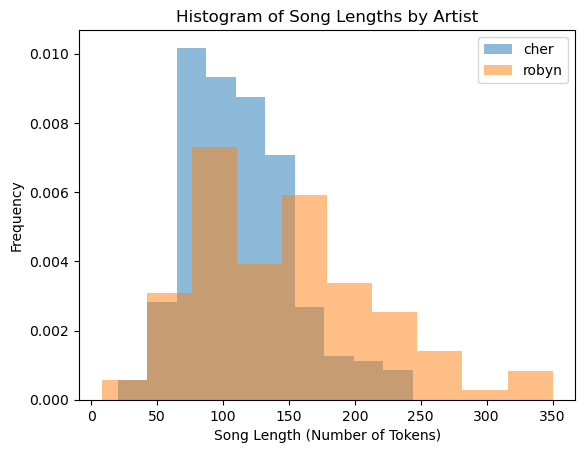

In [21]:
# Extract Token Length from the 'lyrics_stats' column
def get_token_length(index):
    return index[0] # 1st element

# Creates a new column 'Token Length'
lyrics_df['token_length'] = lyrics_df['lyrics_stats'].apply(get_token_length)

# Group by artist and plot the histogram of song lengths
lyrics_df.groupby('artist')['token_length'].plot(kind="hist", density=True, alpha=0.5, legend=True)
plt.xlabel('Song Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.title('Histogram of Song Lengths by Artist')
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

***A: `'\s+'` matches on 1 or more whitespace characters (\s is REGEX for whitespace and + is REGEX for 1 or more)***


In [22]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [29]:
# Your lyric length comparison chart here. 

# Apply tokenize_lyrics function to lyrics_df
lyrics_df['lyrics_tokenize'] = lyrics_df['song_lyrics'].apply(tokenize_lyrics)

# Apply descriptive_stats to the lyrics data and Suppress output from function
with redirect_stdout(io.StringIO()):
    lyrics_df['whitepsace_stats'] = lyrics_df['lyrics_tokenize'].apply(descriptive_stats)
    
# Creates a new column 'Whitespace Token Length' to compare lengths
lyrics_df['whitespace_token_length'] = lyrics_df['whitepsace_stats'].apply(get_token_length)

# Create comparison Data frame with desired columns
comparison_chart_df = lyrics_df.loc[:, ['artist', 'whitespace_token_length', 'token_length']]

# Display result
comparison_chart_df

,artist,whitespace_token_length,token_length
0,cher,325,180
1,cher,257,133
2,cher,291,120
3,cher,79,34
4,cher,134,66
...,...,...,...
415,robyn,489,220
416,robyn,121,53
417,robyn,309,168
418,robyn,170,104


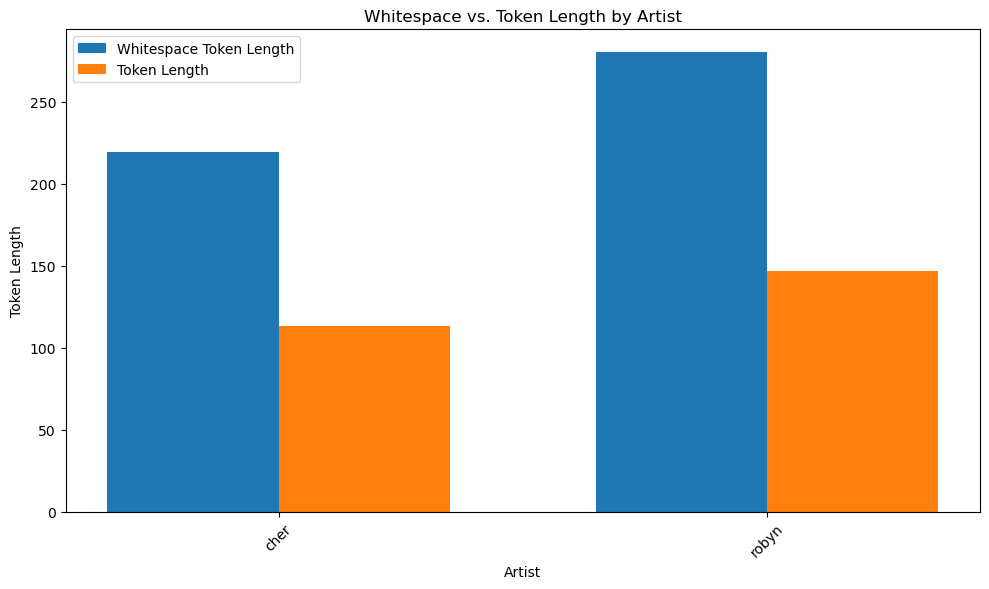

In [30]:
# Group by 'artist' and calculate mean token lengths
grouped_df = comparison_chart_df.groupby('artist').mean()

# Bar width and positions
bar_width = 0.35
index = np.arange(len(grouped_df))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(index, grouped_df['whitespace_token_length'], bar_width, label='Whitespace Token Length')
ax.bar(index + bar_width, grouped_df['token_length'], bar_width, label='Token Length')

# Labels, ticks, and title
ax.set_xlabel('Artist')
ax.set_ylabel('Token Length')
ax.set_title('Whitespace vs. Token Length by Artist')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_df.index, rotation=45)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

<center><b>References:</b></center>

- Albrecht, J., Ramachandran, S., & Winkler, C. (2020). *Blueprints for text analytics using Python.* O'Reilly.
- S, M., & Pieters, M. (2018, October 29). *How to get length of all the tokens of all the list for a given input file in python?.* Stack Overflow. https://stackoverflow.com/questions/53050095/how-to-get-length-of-all-the-tokens-of-all-the-list-for-a-given-input-file-in-py
- McKee, A. (2024, May 23). *How to use the assert statement in Python.* DataCamp. https://www.datacamp.com/tutorial/understanding-the-python-assert-statement
- Mayer , C. (2023, December 14). *How to Open Multiple Text Files in Python (6 Best Methods).* Be on the Right Side of Change. https://blog.finxter.com/how-to-open-multiple-text-files-in-python-6-best-methods/
- Python Software Foundation. (n.d.). *os.path — Common pathname manipulations.* Python documentation. https://docs.python.org/3/library/os.path.html
- Python Software Foundation. (n.d.). *The with statement. Python 3.11.5 documentation.* https://docs.python.org/3/reference/compound_stmts.html#the-with-statement
- Sharma, P. (2021, June 18). *How to read multiple text files from a folder in python?(tkinter).* Tutorialspoint. https://www.tutorialspoint.com/how-to-read-multiple-text-files-from-a-folder-in-python-tkinter
- Willems, K. (2020, January 2). *Python functions: How to call & write functions.* DataCamp. https://www.datacamp.com/tutorial/functions-python-tutorial
- Chris, K. (2022, March 16). *Python functions – how to define and call a function.* freeCodeCamp.org. https://www.freecodecamp.org/news/python-functions-define-and-call-a-function/
- GeeksforGeeks. (2023, September 27). *Split and parse a string in Python.* https://www.geeksforgeeks.org/split-and-parse-a-string-in-python/
- Python Software Foundation. (n.d.). *Text sequence type — str. Python Documentation.* https://docs.python.org/3/library/stdtypes.html#str.split
- GeeksforGeeks. (2024, August 21). *Python: Os.path.basename() method.* https://www.geeksforgeeks.org/python-os-path-basename-method/
- Hodgkinson, L. (2020, December 30). *NLP pipelines with NLTK.* Lee’s Notebook. https://lee-hodg.github.io/blog/nlp/
- Fuchs, M. (2021, May 25). *NLP - text pre-processing II (tokenization and stop words)* - Michael Fuchs Python. MFuchs. https://michael-fuchs-python.netlify.app/2021/05/25/nlp-text-pre-processing-ii-tokenization-and-stop-words/
- GeeksforGeeks. (2024, January 3). *Removing stop words with NLTK in python.* GeeksforGeeks. https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- Pandas Documentation. (n.d.). pandas.DataFrame.isna. Pandas. Retrieved September 15, 2024, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
- Singh, P. (2023, March 31). *How to remove punctuation from Python string?* - shiksha online. Study in India. https://www.shiksha.com/online-courses/articles/how-to-remove-punctuation-from-python-string/#:~:text=down%20the%20process.-,Using%20translate(),character%20or%20delete%20them%20altogether.
- Solomon, B. (2023, July 31). *Pandas GroupBy: Your guide to grouping data in python.* Real Python. https://realpython.com/pandas-groupby/
- Ogunbiyi, I. A. (2022, October 25). *How the Python Lambda Function Works – explained with examples.* freeCodeCamp.org. https://www.freecodecamp.org/news/python-lambda-function-explained/
- GeeksforGeeks. (2024a, August 9). *Applying lambda functions to pandas dataframe.* https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/ 
- OpenAI. (2023). ChatGPT (September 9 version) [Large language model]. https://chat.openai.com/
- Cloud, S. (2024, January 11). *How to remove special characters in pandas dataframe.* Saturn Cloud Blog. https://saturncloud.io/blog/how-to-remove-special-characters-in-pandas-dataframe/
- Orozco, F. (2018, March 22). *Suppress print output in Python.* coding(dose). https://codingdose.info/posts/supress-print-output-in-python/
- Siddharth. (2024, September 11). *How to create a bar plot in Python: A step-by-step guide (updated 2024).* Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/ 